You encounter a fierce panda! Get ready for battle.
Choose difficulty (easy, normal, hard): easy
You chose easy difficulty. Starting with 5 lives.

--- Round Start ---
Lives: 5
Do you want to attack? (yes/no): yes
Attack failed!
The panda counterattacks! You lose a life.
You have 4 lives remaining.

--- Round Start ---
Lives: 4
Do you want to attack? (yes/no): yes
Attack failed!
The panda counterattacks! You lose a life.
You have 3 lives remaining.

--- Round Start ---
Lives: 3
Do you want to attack? (yes/no): yes
Successful attack!
You defeated the panda!
Do you want to take on another challenge for a chance to receive another life? (yes/no): yes
Press Enter to navigate to the next platform...
Challenge on platforms {'D', 'B', 'F'} and {'D', 'B', 'F'} using operation: intersection
Guess the result of the intersection operation: d, f, b
Challenge successfully overcome!
You have encountered Finale Projectus, prepare for battle!

--- Round Start ---
Lives: 3
Do you want to attack? (yes/n

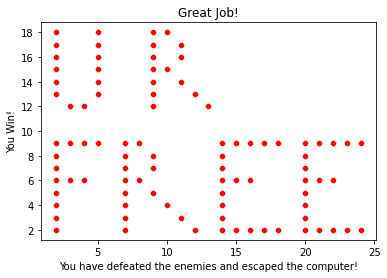

In [109]:
import random

class Character:
    def __init__(self, difficulty="normal"):
        """
        Initialize a Character instance based on the selected difficulty.

        Parameters:
        - difficulty (str): The difficulty level for determining the starting number of lives.
          Options: "easy", "normal", "hard".
        """
        self.difficulty = self._get_valid_difficulty(difficulty)
        self.lives = self._set_starting_lives()

    def _set_starting_lives(self):
        """
        Set the starting number of lives based on the selected difficulty.

        Returns:
        - int: The starting number of lives.
        """
        if self.difficulty == "easy":
            return 5
        elif self.difficulty == "hard":
            return 1
        else:  # Default to "normal" difficulty
            return 3

    def display_stats(self, critical_threshold=2):
        """
        Display the character's lives.

        If the number of lives is below the specified critical threshold,
        the lives message will include '(Critical)'.

        Parameters:
        - critical_threshold (int): The lives threshold for considering the character in critical condition.
          Default is set to 2.
        """
        # Display lives
        lives_message = f"Lives: {self.lives}{' (Critical)' if self.lives < critical_threshold else ''}"

        # Print the final message
        print(lives_message)

    def gain_life(self, amount=1):
        """
        Gain lives by the specified amount.

        Parameters:
        - amount (int): The amount of lives to gain. Default is set to 1.
        """
        self.lives += amount

    def lose_life(self, amount=1):
        """
        Lose lives by the specified amount.

        Parameters:
        - amount (int): The amount of lives to lose. Default is set to 1.
        """
        self.lives -= amount
        if self.lives < 0:
            self.lives = 0  # Ensure lives do not go below zero

    def _get_valid_difficulty(self, difficulty_input):
        """
        Get a valid difficulty level from user input.

        Parameters:
        - difficulty_input (str): The user input for the difficulty level.

        Returns:
        - str: The valid difficulty level.
        """
        tries = 3
        while tries > 0:
            if difficulty_input.lower() in ["easy", "normal", "hard"]:
                return difficulty_input.lower()
            else:
                print(f"Invalid input! You have {tries} {'tries' if tries > 1 else 'try'} remaining.")
                difficulty_input = input("Choose difficulty (easy, normal, hard): ")
                tries -= 1
        print("Defaulting to normal difficulty.")
        return "normal"

    def attack(self):
        """
        Simulate an attack. Generates a random number between 1 and 6.
        A roll of 4 or above is a successful attack; otherwise, it's a fail.

        Returns:
        - bool: True if the attack is successful, False otherwise.
        """
        attack_result = random.randint(1, 6)
        success = attack_result >= 4
        if success:
            print("Successful attack!")
        else:
            print("Attack failed!")
        return success

# ObstacleCourse definition here (empty for now)
        

class ObstacleCourse(Character):
    OPERATIONS = ["intersection", "union", "difference"]
    OBSTACLE_COUNT = 3

    def __init__(self, difficulty="normal"):
        super().__init__(difficulty)
        self.obstacle_count = 0
        
    def play_game(self):
        while True:
            input("Press Enter to navigate to the next platform...")
            challenge_completed = self.handle_platform_challenge()
            if not challenge_completed:
                return False  # Return False if the challenge was not completed
        return True  # Return True if all challenges are completed
    
    def generate_random_platform(self):
        platforms = [
            {'A', 'B', 'C'},
            {'C', 'D', 'E'},
            {'B', 'D', 'F'},
            # Add more platforms as needed
        ]
        return random.choice(platforms)

    def generate_random_operation(self):
        return random.choice(self.OPERATIONS)

    def parse_user_guess(self, user_guess_str):
        try:
            elements = [el.strip().upper() for el in user_guess_str.replace('{', '').replace('}', '').split(',') if el.strip()]
            return set(elements)
        except Exception as e:
            print(f"Invalid input format: {e}")
            return None

    def handle_platform_challenge(self):
        set_operation = self.generate_random_operation()
        platform1 = self.generate_random_platform()
        platform2 = self.generate_random_platform()

        print(f"Challenge on platforms {platform1} and {platform2} using operation: {set_operation}")

        if set_operation == "intersection":
            correct_result = platform1.intersection(platform2)
        elif set_operation == "union":
            correct_result = platform1.union(platform2)
        elif set_operation == "difference":
            correct_result = platform1.difference(platform2)

        for attempt in range(3):
            user_guess_str = input(f"Guess the result of the {set_operation} operation: ")
            user_guess = self.parse_user_guess(user_guess_str)

            if user_guess is None:
                print("Please enter a valid set.")
                continue

            if user_guess == correct_result:
                print("Challenge successfully overcome!")
                self.obstacle_count += 1
                boss_fight = Bossfight()
                    
                boss_fight.battle_boss()
                break
            else:
                if attempt == 2:
                    print("Challenge failed three times. Moving to the next platform.")
                    boss_fight = Bossfight()
                    boss_fight.battle_boss()
                    return
                else:
                    print("Challenge failed! Try again.")

        if self.obstacle_count == self.OBSTACLE_COUNT:
            print("Congratulations! You've passed all obstacles and gained an extra life!")
            self.lives = Character.gain_life()
            self.obstacle_count = 0
            print('"Congratulations, excellent work my pupil')
            user_progression = input("'Are you ready to move onwards?', the wise mage Aric asks")
            if user_progression == "yes":
                Game.start_boss_fight()
            return True
        return False



    def play_game(self):
        while True:
            input("Press Enter to navigate to the next platform...")
            if not self.handle_platform_challenge():
                break




# class (ObstacleCourse) definition ends here




class ChallengePanda(Character):
    def __init__(self):
        # Initialize the ChallengePanda by calling the parent class constructor
        super().__init__()
        self.continue_fight = True

    def battle_panda(self):
        """
        Start the battle with a panda. Prompt the user to input difficulty and attack the panda.
        """
        print("You encounter a fierce panda! Get ready for battle.")

        # Prompt user to choose difficulty with error handling
        difficulty_input = input("Choose difficulty (easy, normal, hard): ")
        self.difficulty = self._get_valid_difficulty(difficulty_input)
        self.lives = self._set_starting_lives()

        print(f"You chose {self.difficulty} difficulty. Starting with {self.lives} lives.")

        # Battle the panda
        while self.lives > 0 and self.continue_fight:
            print("\n--- Round Start ---")
            self.display_stats()

            # Prompt user to attack with error handling
            while True:
                attack_input = input("Do you want to attack? (yes/no): ").lower()
                if attack_input in ["yes", "no"]:
                    break
                else:
                    print("Invalid input! Please enter 'yes' or 'no'.")

            if attack_input == "yes":
                if self.attack():
                    print("You defeated the panda!")
                    challenge_choice = input("Do you want to take on another challenge for a chance to receive another life? (yes/no): ").lower()
                    while challenge_choice not in ["yes", "no"]:
                        print("Invalid input! Please enter 'yes' or 'no'.")
                        challenge_choice = input("Do you want to take on another challenge for a chance to receive another life? (yes/no): ").lower()

                    if challenge_choice == "yes":
                        obstacle_course_challenge = ObstacleCourse(difficulty=self.difficulty)
                        obstacle_course_challenge.play_game()
                        self.continue_fight = False  # Set to False to prevent re-entering the panda fight
                        break
                    else:
                        print("You decided not to take on another challenge.")
                        self.continue_fight = False  # Set to False as the fight is over
                        boss_fight = Bossfight()
                    
                        boss_fight.battle_boss()
                    break  # Break out of the while loop as the panda fight is over

                else:
                    print("The panda counterattacks! You lose a life.")
                    self.lose_life()
            else:
                print("You decide not to attack. The panda is unimpressed.")
                break  # Break out of the while loop as the player chose not to attack

            if self.lives == 0:
                print("Game Over! The panda has defeated you.")
            else:
                print(f"You have {self.lives} lives remaining.")
                

import random
import pandas as pd
import seaborn as sns

class Bossfight(Character):
    def __init__(self, boss_name="Finale Projectus", boss_health=25):
        super().__init__()
        self.boss_name = boss_name
        self.boss_health = boss_health

    def attack_boss(self):
        """
        Attack the boss and calculate damage. Generates random number between 1 and 7 for # of damage dealt
        """
        damage = random.randint(1, 7)  # Random damage between 1 and 7
        print(f"You attack the boss dealing {damage} damage.")
        self.boss_health -= damage

        if self.boss_health <= 0:
            print(f"You have defeated {self.boss_name}!")
            return True
        else:
            print(f"{self.boss_name} has {self.boss_health} health remaining.")
            return False
    
    def boss_counterattack(self):
        """
        Boss makes a counterattack with a 1 in 3 chance.
        """
        if random.randint(1, 3) == 1:  # 1 in 3 chance
            print(f"The {self.boss_name} counterattacks!")
            self.lose_life()
            if self.lives > 0:
                print(f"You have {self.lives} lives remaining.")
            else:
                print("You have been defeated by the boss!")


    def battle_boss(self):
        print(f"You have encountered {self.boss_name}, prepare for battle!")
        
        while self.lives > 0 and self.boss_health > 0:
            print("\n--- Round Start ---")
            self.display_stats()

            attack_input = input("Do you want to attack? (yes/no): ").lower()
            while attack_input not in ["yes", "no"]:
                print("Invalid input! Please enter 'yes' or 'no'.")
                attack_input = input("Do you want to attack? (yes/no): ").lower()

            if attack_input == "yes":
                boss_defeated = self.attack_boss()
                if boss_defeated:
                    print
                    viz_input = input("Are you ready to visualize the scroll? (yes/no): ")
                    while viz_input not in ["yes", "no"]:
                        print("Invalid input! Please enter 'yes' or 'no'.")
                    if viz_input == "yes":
                        df = pd.read_csv("FPscroll.csv")
                        plot = sns.scatterplot(x='col1', y='col2', data=df, color='red')
                        plot.set_title('Great Job!')
                        plot.set_ylabel('You Win!')
                        plot.set_xlabel('You have defeated the enemies and escaped the computer!')

                    break
                else:
                    if random.randint(1, 3) == 1:  # 1 in 3 chance
                        print(f"The {self.boss_name} counterattacks!")
                        self.lose_life()
                    if self.lives > 0:
                        print(f"You have {self.lives} lives remaining.")
                    else:
                        print("You have been defeated by the boss!")
            else:
                print(f"You choose not to attack. {self.boss_name} is waiting.")
    
        if self.lives == 0:
            print("Game Over! You have been defeated.")



                
class Game():
    def __init__(self):
        self.character = ChallengePanda()

    def start_panda_fight(self):
        self.character.battle_panda()

    def start_obstacle_course(self):
        obstacle_course_challenge = ObstacleCourse(difficulty=self.character.difficulty)
        return obstacle_course_challenge.play_game()

    def start_boss_fight(self):
        boss_fight = Bossfight(current_lives=self.character.lives)
        boss_fight.battle_boss()

if __name__ == "__main__":
    game = Game()
    if game.start_panda_fight():
        print("Do you want to take on the obstacle course? (yes/no): ")
        if input().lower() == "yes":
            if game.start_obstacle_course():
                print("Do you want to proceed to the boss fight? (yes/no): ")
                if input().lower() == "yes":
                    game.start_boss_fight()
                else:
                    print("Game Over. You chose not to fight the boss.")
            else:
                print("Game Over. You failed the obstacle course.")
        else:
            print("Game Over. You chose not to take on the obstacle course.")


In [ ]:
import pandas as pd
import seaborn as sns


class Bossfight(Character):
    def __init__(self):
        super().__init__()
        self.bosshealth = 
    def battle_boss(self):
        print("You have encountered the biggest enemy of them all, prepare for battle!")
        outcome = None  # Initialize outcome

        while self.lives > 0:
            print("\n--- Round Start ---")
            self.display_stats(

            attack_input = input("Do you want to attack? (yes/no): ").lower()
            while attack_input not in ["yes", "no"]:
                print("Invalid input! Please enter 'yes' or 'no'.")
                attack_input = input("Do you want to attack? (yes/no): ").lower()

            if attack_input == "yes":
                if self.attack():
                    print("You defeated the Boss and he dropped an indecipherable scroll. \n Aric tells you you must *visualize* the scroll")
                    outcome = "success"
                    break
                else:
                    self.lose_life()

        if outcome == "success":
            viz_input = input("Are you ready to visualize the scroll? (yes/no): ")
            while viz_input not in ["yes", "no"]:
                print("Invalid input! Please enter 'yes' or 'no'.")
                viz_input = input("Are you ready to visualize the scroll? (yes/no): ")

            if viz_input == "yes":
                df = pd.read_csv("FPscroll.csv")
                plot = sns.scatterplot(x='col1', y='col2', data=df, color='red')
                plot.set_title('Great Job!')
                plot.set_ylabel('You Win!')
                plot.set_xlabel('You have defeated the enemies and escaped the computer!')

        elif self.lives == 0:
            print("Game Over! The final boss has defeated you.")

In [3]:
# Example usage:
if __name__ == "__main__":
    # Create an instance of ChallengePanda
    challenge_panda = ChallengePanda()

    # Start the battle with the panda
    challenge_panda.battle_panda()

You encounter a fierce panda! Get ready for battle.
Choose difficulty (easy, normal, hard): easy
You chose easy difficulty. Starting with 5 lives.

--- Round Start ---
Lives: 5
Do you want to attack? (yes/no): yes
Attack failed!
The panda counterattacks! You lose a life.
You have 4 lives remaining.

--- Round Start ---
Lives: 4
Do you want to attack? (yes/no): yes
Successful attack!
You defeated the panda!
Do you want to take on another challenge for a chance to recive another life? (yes/no): yes
Running the obstacle course... (Replace this with the actual obstacle course code)
You have 4 lives remaining.

--- Round Start ---
Lives: 4
Do you want to attack? (yes/no): yes
Attack failed!
The panda counterattacks! You lose a life.
You have 3 lives remaining.

--- Round Start ---
Lives: 3
Do you want to attack? (yes/no): yes
Successful attack!
You defeated the panda!
Do you want to take on another challenge for a chance to recive another life? (yes/no): no
You decided not to take on anothe

In [44]:
import random
import pandas as pd
import seaborn as sns

class Bossfight(Character):
    def __init__(self, boss_name="Finale Projectus", boss_health=25):
        super().__init__()
        self.boss_name = boss_name
        self.boss_health = boss_health

    def attack_boss(self):
        """
        Attack the boss and calculate damage. Generates random number between 1 and 7 for # of damage dealt
        """
        damage = random.randint(1, 7)  # Random damage between 1 and 7
        print(f"You attack the boss dealing {damage} damage.")
        self.boss_health -= damage

        if self.boss_health <= 0:
            print(f"You have defeated {self.boss_name}!")
            return True
        else:
            print(f"{self.boss_name} has {self.boss_health} health remaining.")
            return False
    
    def boss_counterattack(self):
        """
        Boss makes a counterattack with a 1 in 3 chance.
        """
        if random.randint(1, 3) == 1:  # 1 in 3 chance
            print(f"The {self.boss_name} counterattacks!")
            self.lose_life()
            if self.lives > 0:
                print(f"You have {self.lives} lives remaining.")
            else:
                print("You have been defeated by the boss!")


    def battle_boss(self):
        print(f"You have encountered {self.boss_name}, prepare for battle!")
        
        while self.lives > 0 and self.boss_health > 0:
            print("\n--- Round Start ---")
            self.display_stats()

            attack_input = input("Do you want to attack? (yes/no): ").lower()
            while attack_input not in ["yes", "no"]:
                print("Invalid input! Please enter 'yes' or 'no'.")
                attack_input = input("Do you want to attack? (yes/no): ").lower()

            if attack_input == "yes":
                boss_defeated = self.attack_boss()
                if boss_defeated:
                    print
                    viz_input = input("Are you ready to visualize the scroll? (yes/no): ")
                    while viz_input not in ["yes", "no"]:
                        print("Invalid input! Please enter 'yes' or 'no'.")
                    if viz_input == "yes":
                        df = pd.read_csv("FPscroll.csv")
                        plot = sns.scatterplot(x='col1', y='col2', data=df, color='red')
                        plot.set_title('Great Job!')
                        plot.set_ylabel('You Win!')
                        plot.set_xlabel('You have defeated the enemies and escaped the computer!')

                    break
                else:
                    if random.randint(1, 3) == 1:  # 1 in 3 chance
                        print(f"The {self.boss_name} counterattacks!")
                        self.lose_life()
                    if self.lives > 0:
                        print(f"You have {self.lives} lives remaining.")
                    else:
                        print("You have been defeated by the boss!")
            else:
                print(f"You choose not to attack. {self.boss_name} is waiting.")
    
        if self.lives == 0:
            print("Game Over! You have been defeated.")




Welcome to the Boss fight!
You have encountered Finale Projectus, prepare for battle!

--- Round Start ---
Lives: 3
Do you want to attack? (yes/no): yes
You attack the boss dealing 7 damage.
Finale Projectus has 18 health remaining.
You have 3 lives remaining.

--- Round Start ---
Lives: 3
Do you want to attack? (yes/no): yes
You attack the boss dealing 1 damage.
Finale Projectus has 17 health remaining.
You have 3 lives remaining.

--- Round Start ---
Lives: 3
Do you want to attack? (yes/no): yes
You attack the boss dealing 4 damage.
Finale Projectus has 13 health remaining.
You have 3 lives remaining.

--- Round Start ---
Lives: 3
Do you want to attack? (yes/no): yes
You attack the boss dealing 2 damage.
Finale Projectus has 11 health remaining.
You have 3 lives remaining.

--- Round Start ---
Lives: 3
Do you want to attack? (yes/no): yes
You attack the boss dealing 3 damage.
Finale Projectus has 8 health remaining.
You have 3 lives remaining.

--- Round Start ---
Lives: 3
Do you wan

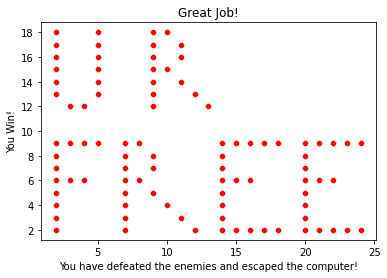

In [45]:
def main():
    print("Welcome to the Boss fight!")

    # Create an instance of the Bossfight class
    boss_fight = Bossfight()

    # Start the boss battle
    boss_fight.battle_boss()

    # After the battle, you can include any additional logic or messages
    print("Thank you for playing!")

if __name__ == "__main__":
    main()
